In [1]:
from data.data_loader import get_data
import tensorflow as tf

import joblib

import numpy as np

import scikitplot as skplt
import matplotlib.pyplot as plt

2023-04-16 02:39:59.612915: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-16 02:39:59.744884: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-16 02:39:59.745602: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-16 02:40:00.589508: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
VGG = joblib.load('./raw_models/vgg_model.pkl')
VGG

#### **Getting tessting data**

In [3]:
seed = 0
train_tensor, validation_tensor, test_tensor = get_data(selected_fold=1, seed=seed)

In [4]:
AUTOTUNE = tf.data.AUTOTUNE
test_data = test_tensor.cache().prefetch(buffer_size=AUTOTUNE)

#### **Model evaluation**

In [5]:
loss, auc, accuracy = VGG.evaluate(test_data, verbose=1)

2023-04-16 02:40:04.710473: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [1399]
	 [[{{node Placeholder/_1}}]]
2023-04-16 02:40:05.385767: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 359661568 exceeds 10% of free system memory.
2023-04-16 02:40:05.584051: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 359661568 exceeds 10% of free system memory.
2023-04-16 02:40:06.115201: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 179830784 exceeds 10% of free system memory.
2023-04-16 02:40:06.299510: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 179830784 exceeds 10% of free system memory.


 1/50 [..............................] - ETA: 3:17 - loss: 0.4522 - roc_auc: 0.8556 - binary_accuracy: 0.7857

2023-04-16 02:40:08.783405: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 359661568 exceeds 10% of free system memory.


50/50 [==============================] - 275s 6s/step - loss: 0.4337 - roc_auc: 0.8719 - binary_accuracy: 0.8070


In [13]:
auc, accuracy

(0.871889591217041, 0.807004988193512)

In [6]:
y_true, y_pred = VGG.predict(test_data)

2023-04-16 02:44:40.280061: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [1399]
	 [[{{node Placeholder/_1}}]]
2023-04-16 02:44:40.281047: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [1399]
	 [[{{node Placeholder/_1}}]]


In [7]:
y_probas = np.column_stack((1 - y_pred, y_pred))

##### Target vs Score analysis

In [8]:
from plots import plot_target_vs_score

In [9]:
plot_target_vs_score(y_true, y_pred, quantiles=10)

In [10]:
plot_target_vs_score(y_true, y_pred, quantiles=100, lower_limit=90)

##### KS test

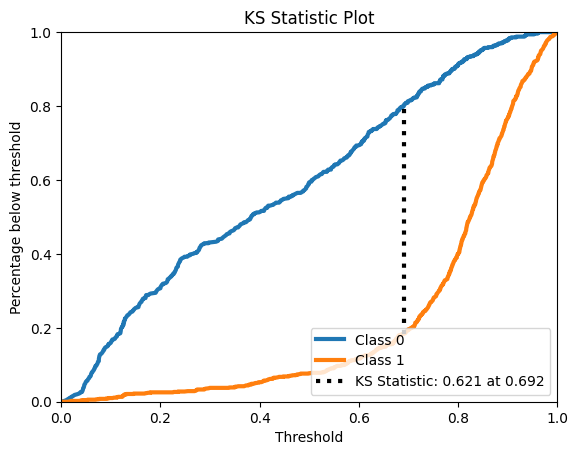

In [11]:
skplt.metrics.plot_ks_statistic(y_true=y_true, y_probas=y_probas)
plt.show()